In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Top Recommended Locations based on Popularity:
     place_id                           name  checkins_count
334       335        Iglesia San Fco De Asis           25489
187       188            1 Oakfield Cottages           17323
182       183                      Hillcrest           14967
630       631             Floral Expressions           14590
188       189            2 Oakfield Cottages            6855
168       169    Badgers Oak Vetinary Clinic            5953
166       167        Country Cars (Kent) LTD            5430
18         19  Lakeside Go-Karts & Mini Golf            4525
163       164              Cranbrook Kitcars            4423
161       162         In Touch Installations            4288


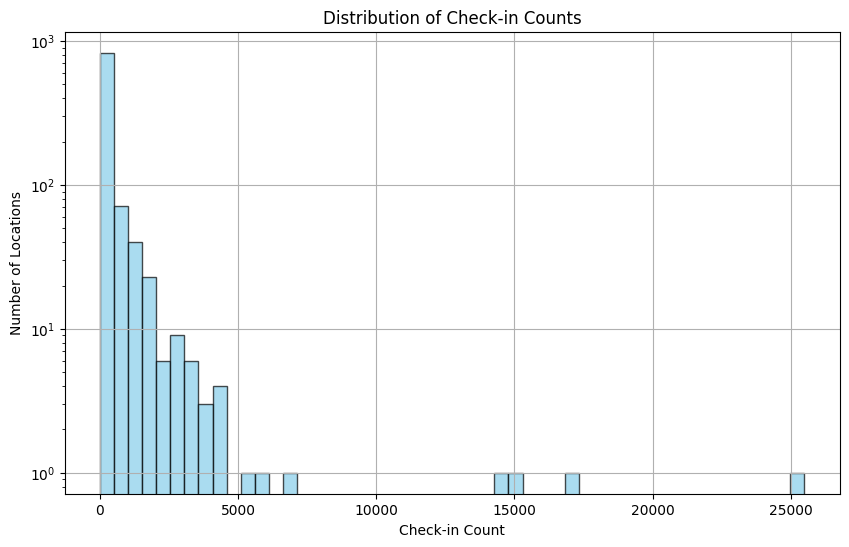

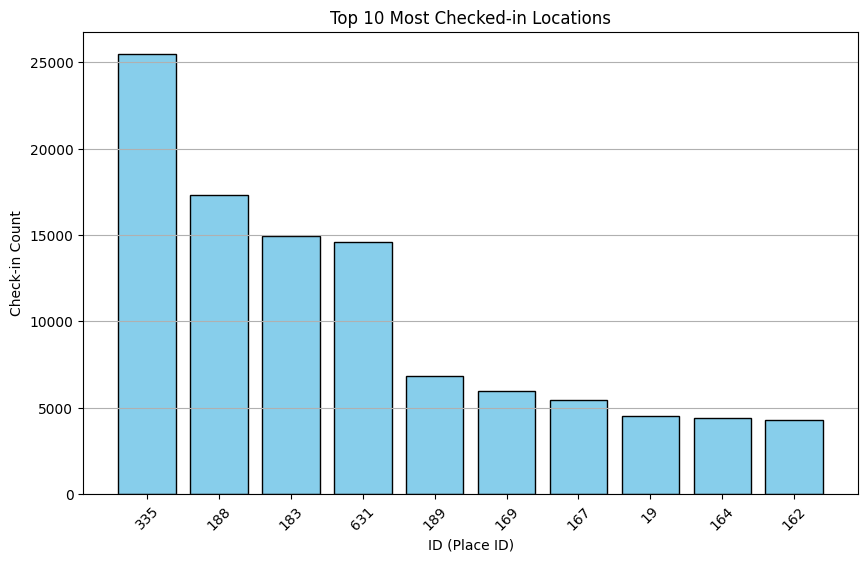

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the popularity scores
file_path_popularity = '/content/drive/My Drive/spots_subset1.csv'
popularity_scores = pd.read_csv(file_path_popularity)

# Load the dataset containing location names
file_path_names = '/content/drive/My Drive/spots_subset2.csv'
location_names = pd.read_csv(file_path_names, encoding='latin1')

# Merge popularity scores with location names
popularity_scores = pd.merge(popularity_scores, location_names[['place_id', 'name']], left_on='id', right_on='place_id', how='left')

# Recommend top N popular locations
top_n = 10
top_locations = popularity_scores.nlargest(top_n, 'checkins_count')

# Print the top recommended locations with ID, place ID, and name
print("Top Recommended Locations based on Popularity:")
print(top_locations[[ 'place_id', 'name', 'checkins_count']])

# Visualize the distribution of check-in counts
plt.figure(figsize=(10, 6))
plt.hist(popularity_scores['checkins_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Check-in Counts')
plt.xlabel('Check-in Count')
plt.ylabel('Number of Locations')
plt.grid(True)
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.show()

# Plot histogram of the 10 most checked-in locations
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_locations)), top_locations['checkins_count'], color='skyblue', edgecolor='black')
plt.title('Top 10 Most Checked-in Locations')
plt.xlabel('ID (Place ID)')
plt.ylabel('Check-in Count')
plt.xticks(range(len(top_locations)), top_locations['id'])  # Set x-axis ticks to IDs of top locations
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y')  # Add gridlines to y-axis only
plt.show()